In [61]:
import sys
sys.path.append('../')
import pandas as pd
import seaborn as sns; sns.set(style='darkgrid', context='notebook')
from matplotlib import pyplot as plt
from figures.plotting import annotate_corr_grid

benchmark = 'bonner.Object2Vec.pls.roi=LOC'
man_metric = 'intra-dim'
pooling_enc = False
dataset_man = 'imagenet21k'
pooling_man = True

data = pd.merge(pd.read_csv(f'../results/encoding|benchmark:{benchmark}|pooling:{pooling_enc}.csv'),
                pd.read_csv(f'../results/manifolds|dataset:{dataset_man}|pooling:{pooling_man}.csv'), 
                on=['architecture', 'task', 'kind', 'source', 'layer'])

metric_columns = ['between-concept radius', 'within-concept radius (mean)', 'between-concept dimensionality', 'within-concept dimensionality (mean)', 
                  'signal (mean)', 'bias (mean)', 'other signal-noise-overlap (mean)', 'self signal-noise-overlap (mean)', 'signal-noise-ratio (mean)']
metric_label_map = {'between-concept dimensionality': 'inter-dim', 'between-concept radius': 'inter-radius', 
                    'bias (mean)': 'bias', 'signal (mean)': 'signal', 'signal-noise-ratio (mean)': 'snr', 
                    'other signal-noise-overlap (mean)': 'other-sno', 'self signal-noise-overlap (mean)': 'self-sno', 
                    'within-concept dimensionality (mean)': 'intra-dim', 'within-concept radius (mean)': 'intra-radius'}
metric_columns = [metric_label_map[m] for m in metric_columns]
data = data.rename(columns=metric_label_map)

metric_stds = [c for c in data.columns if '(std)' in c]
data = data.drop(columns=metric_stds)

tf_to_pt_layer_map = {'encode_2': 'layer1.0.relu', 'encode_3': 'layer1.1.relu', 
                      'encode_4': 'layer2.0.relu', 'encode_5': 'layer2.1.relu', 
                      'encode_6': 'layer3.0.relu', 'encode_7': 'layer3.1.relu', 
                      'encode_8': 'layer4.0.relu', 'encode_9': 'layer4.1.relu'}
data.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)

data = data.melt(id_vars=[c for c in data.columns if c not in metric_columns], 
                 value_vars=metric_columns, var_name='metric', value_name='metric_value')

data.head()

,layer,score,score_error,architecture,task,kind,source,metric,metric_value
0,layer1.0.relu,0.248093,0.007623,ResNet18,None,Untrained,PyTorch,inter-radius,0.159131
1,layer1.1.relu,0.257415,0.006728,ResNet18,None,Untrained,PyTorch,inter-radius,0.212732
2,layer2.0.relu,0.322613,0.006367,ResNet18,None,Untrained,PyTorch,inter-radius,0.296849
3,layer2.1.relu,0.257645,0.007245,ResNet18,None,Untrained,PyTorch,inter-radius,0.431102
4,layer3.0.relu,0.315366,0.009026,ResNet18,None,Untrained,PyTorch,inter-radius,0.551655


---
# All models and layers

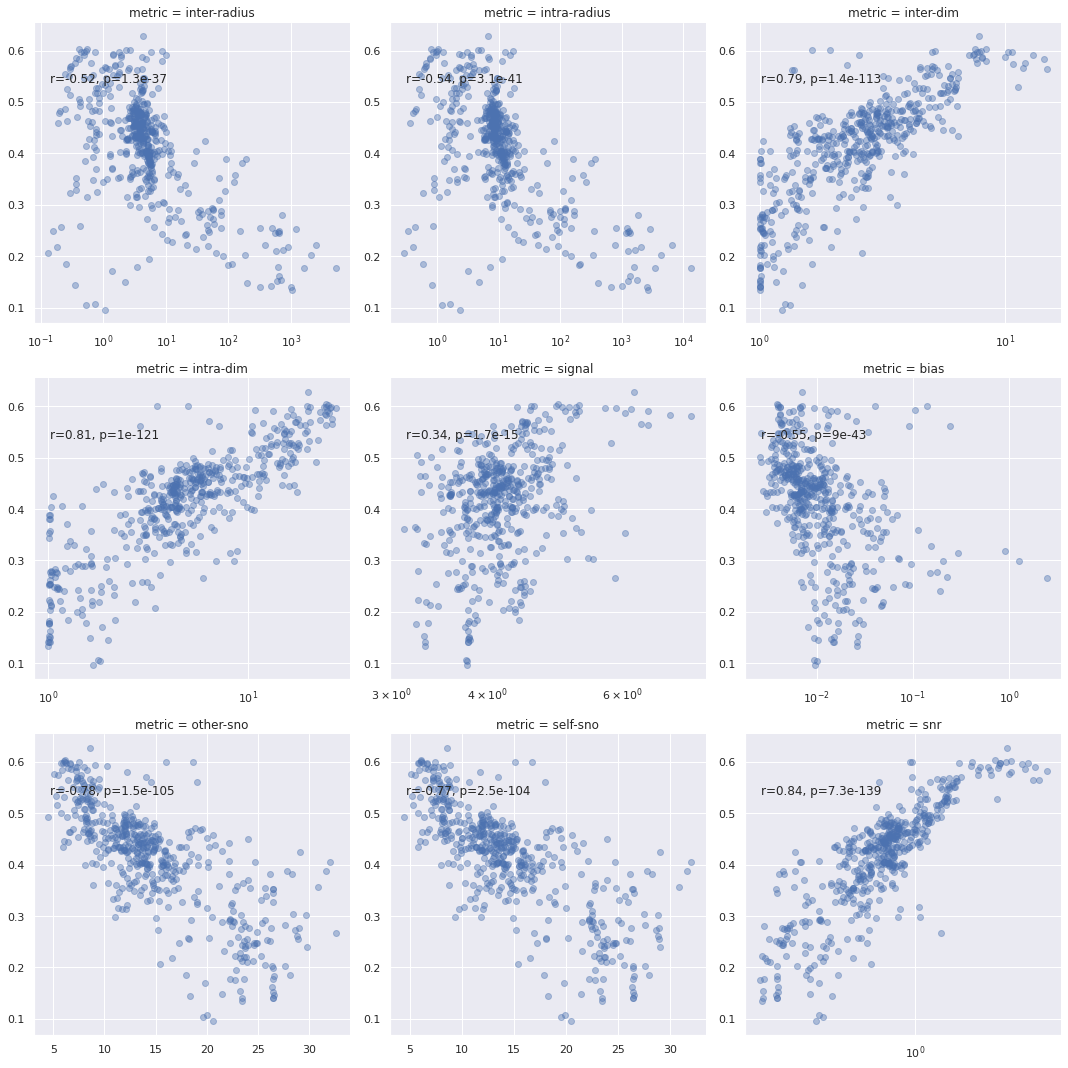

In [62]:
g = sns.lmplot(data=data, x='metric_value', y='score', col='metric', col_wrap=3,
               scatter_kws={'alpha':0.4}, sharex=False, sharey=False, height=5, fit_reg=False)
for i in [0, 1, 2, 3, 4, 5, 8]:
    g.axes[i].set_xscale('log')
annotate_corr_grid(g, x='metric_value', y='score')
plt.show()

---
# ResNet 18

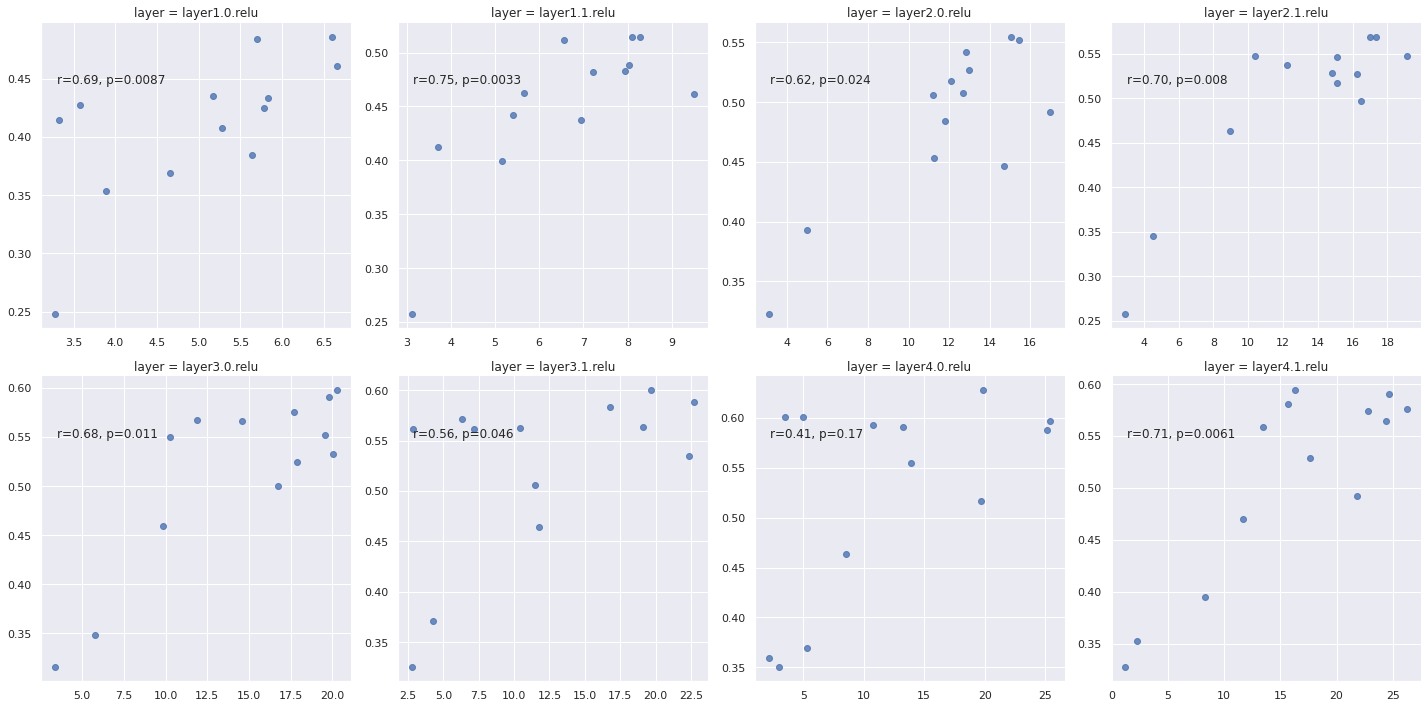

In [65]:
results = data[(data.architecture == 'ResNet18') & (data.metric == man_metric)]
g = sns.lmplot(data=results, x='metric_value', y='score', col='layer', col_wrap=4,
               sharex=False, sharey=False, height=5, fit_reg=False)
annotate_corr_grid(g, x='metric_value', y='score')
plt.show()

---
# Taskonomy (ResNet 50)

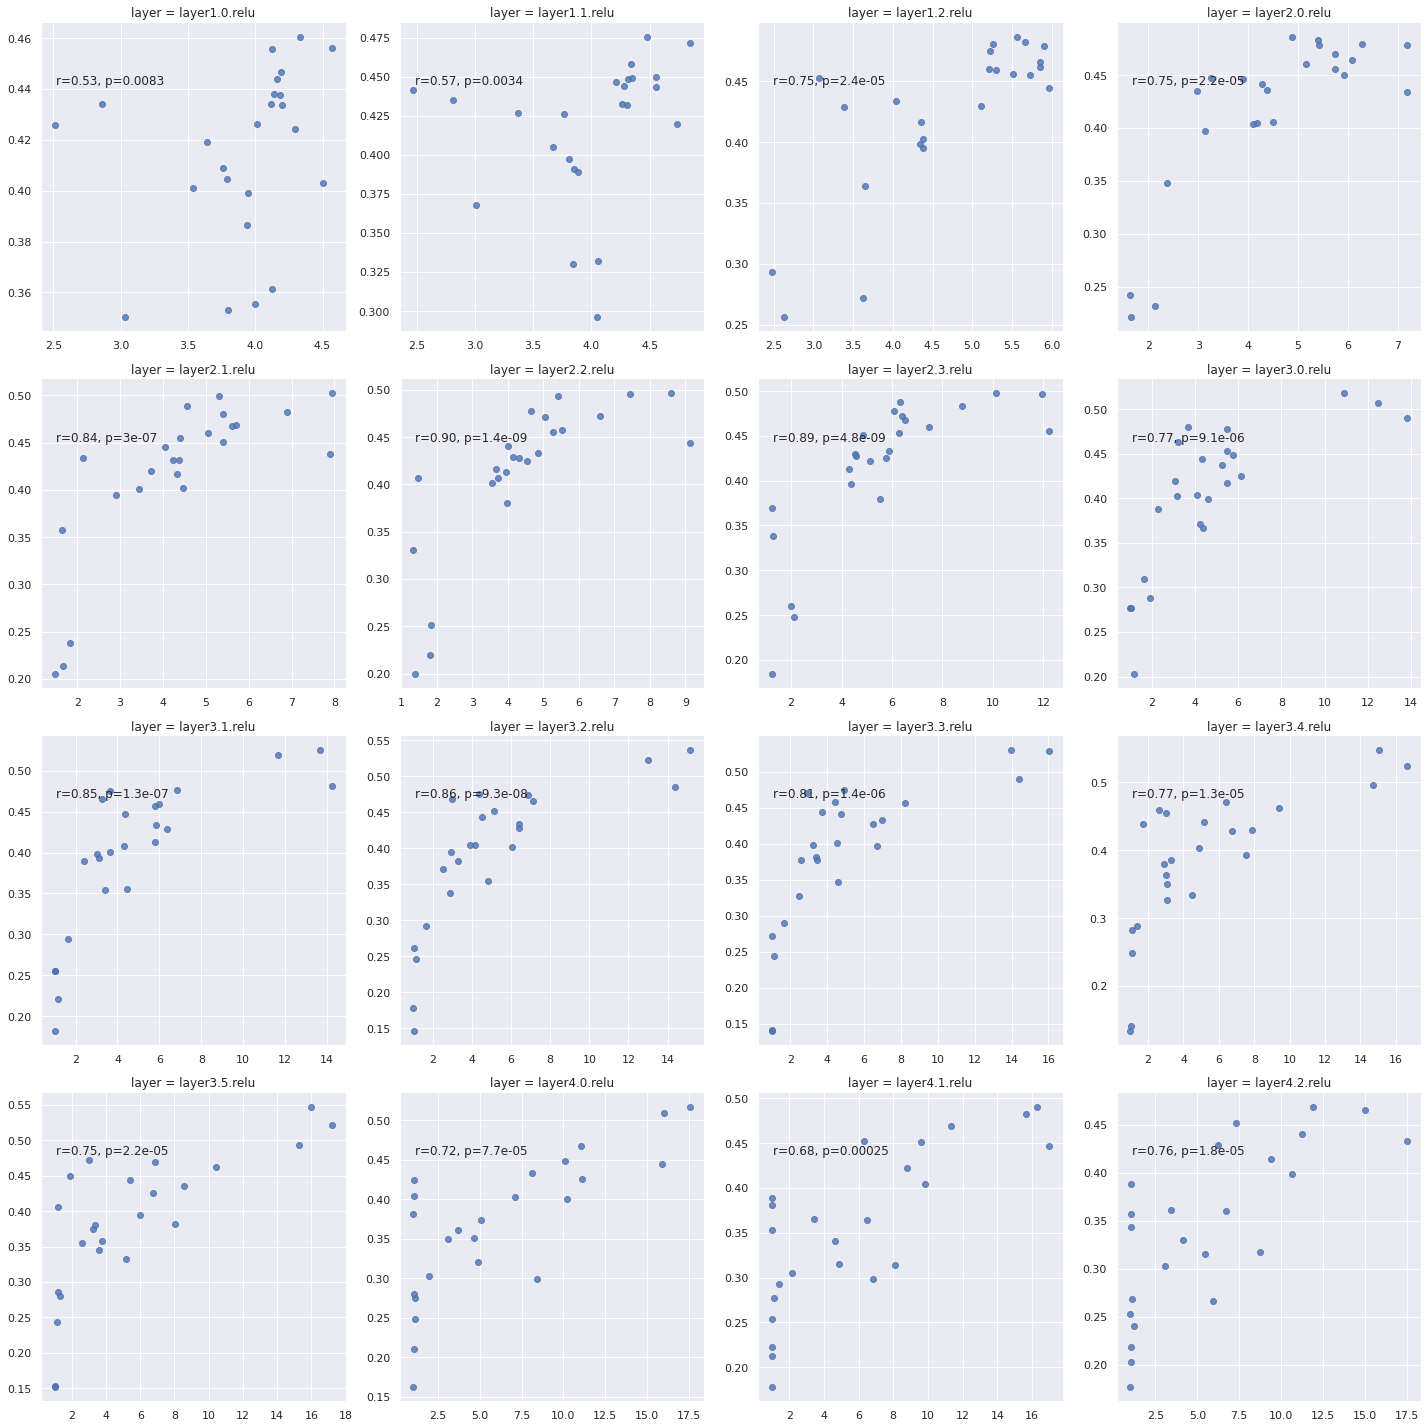

In [54]:
results = data[(data.source == 'Taskonomy') & (data.metric == man_metric)]
g = sns.lmplot(data=results, x='metric_value', y='score', col='layer', col_wrap=4,
               sharex=False, sharey=False, height=5, fit_reg=False)
annotate_corr_grid(g, x='metric_value', y='score')
plt.show()